In [62]:
import numpy as np      # Manejo de arreglos (álgebra lineal en Python)
import pandas as pd     # Manejo de Dataframes (tipo de datos)
import matplotlib.pyplot as plt   # Gráficas
import seaborn as sns     ## gráficas estadísticas (histogramas)

In [63]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vSoleTscHZCrVRMTbAc31GFXwMG6LF6oKEa4G_Ff45i-InKpDpzSfPSn43PAMeINbC3gEX0V7POhA7V/pub?output=csv'
X_= pd.read_csv(url)
X_=X_.values

In [64]:
X_.shape

(17737, 45)

In [65]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X_pca=pca.fit_transform(X_)

In [66]:
varianza=pca.explained_variance_ratio_
print(sum(varianza))

0.839709399866017


In [67]:
X_pca

array([[-111.428248  , -105.82328689,   43.72869518],
       [-131.92723819,   14.96199336,   95.34477456],
       [-103.19393052,  -78.67699867,   46.45030002],
       ...,
       [ -10.68319181,  -14.04346465,  -17.13229034],
       [   7.45081026,   14.93684639,  -28.8637343 ],
       [  19.03437257,  -35.89659912,  -46.46619708]])

# k-means euclidiana

In [68]:
import random

In [69]:
# Definimos la distancia Euclideana
def distancia_euclideana(x, c):
  return np.sqrt(np.sum((x - c) ** 2))

# Paso 1: Número de clusters
k = 4  # Por heurística de los datos y método del codo

# Paso 2: Elección de centroides
## Centroides
dimension = X_.shape[0]  # Número de jugadores (filas del DataFrame)
centroids_euclideana = X_[random.sample(range(dimension), k)]

### Almacenamiento de etiquetas
clusters_manuales = np.zeros(dimension)  ## vector nulo para almacenar etiquetas
### Almacenamiento de distancias
distancias = np.zeros((dimension, k))     ## Matriz nula para almacenar distancias

# Paso 3: Implementación del método y criterios de convergencia
tol = 1e-6
error = 100

# Repetir hasta que los centroides dejen de moverse significativamente
while error > tol:
    # Asignación de puntos a los clusters más cercanos
    for i in range(dimension):  ## Iterar sobre las filas. La i representa jugador
        for j in range(k):      ## Iterar sobre las columnas. La j representa centroide
            distancias[i, j] = distancia_euclideana(X_[i], centroids_euclideana[j])
        clusters_manuales[i] = np.argmin(distancias[i])

    # Almacenar los centroides previos antes de actualizarlos
    centroids_prev = np.copy(centroids_euclideana) ## Creación variable auxiliar para comparar con los nuevos centroides

    # Actualizar centroides
    for l in range(k):  ### Iteramos sobre los clusters (k = 4)
        puntos_cluster = X_[clusters_manuales == l] ### Estamos tomando todos los puntos que tengan la etiqueta L

        # Si el cluster no está vacío, recalcula el centroide
        if len(puntos_cluster) > 0:
            centroids_euclideana[l] = np.mean(puntos_cluster, axis=0)  ### Promedia los puntos que pertenecen al cluster, columna por columna
        else:
            print(f"Cluster {l} vacío, reasignando centroide aleatoriamente")
            centroids_euclideana[l] = X_[np.random.choice(dimension)]

    # Calcular el error como el cambio promedio en los centroides
    error = np.mean([distancia_euclideana(centroids_euclideana[l], centroids_prev[l]) for l in range(k)])
    print(error)

57.29233805226176
11.15459368960599
6.64478162307892
3.9370414050534244
2.747717653067897
2.2811634403970924
1.5995864094170424
1.2420296962671666
0.9571067811865476
0.25
0.25
0.0


In [70]:
def graficar_clusters_PCA2D(clusters, metodo, centroids):
    # Crear un gráfico de dispersión 2D usando las dos primeras componentes
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                    hue=clusters, palette='Set1',
                    alpha=0.8, s = 100)
    plt.scatter(centroids[:,0], centroids[:,1], c= 'black', s = 100, label = 'centroides')
    plt.title(f'Visualización 2D de la Clusterización (PCA) {metodo}', fontsize=16)

    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.grid(linestyle = '-', alpha  = 0.5)
    plt.legend(title='Cluster')
    plt.show()


In [71]:
centroids_euclideana=np.array(centroids_euclideana)
centroids_euclideana=pca.transform(centroids_euclideana)

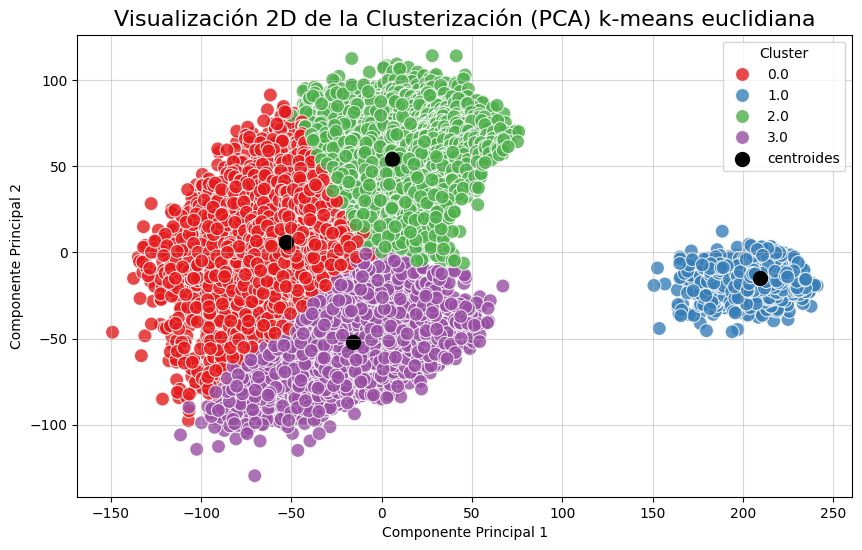

In [72]:
kmeans_2D=graficar_clusters_PCA2D(clusters_manuales, 'k-means euclidiana', centroids_euclideana)


In [73]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_clusters_PCA3D(clusters, metodo):
    # Crear el gráfico 3D
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los puntos con borde blanco
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                         c=clusters, cmap='Set1', s=100,
                         edgecolor='white', alpha=0.8)

    # Etiquetas de los ejes y título
    ax.set_title(f'Visualización 3D de la Clusterización (PCA) {metodo}', fontsize=16)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')

    # Añadir la leyenda
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)

    # Mostrar el gráfico
    plt.show()

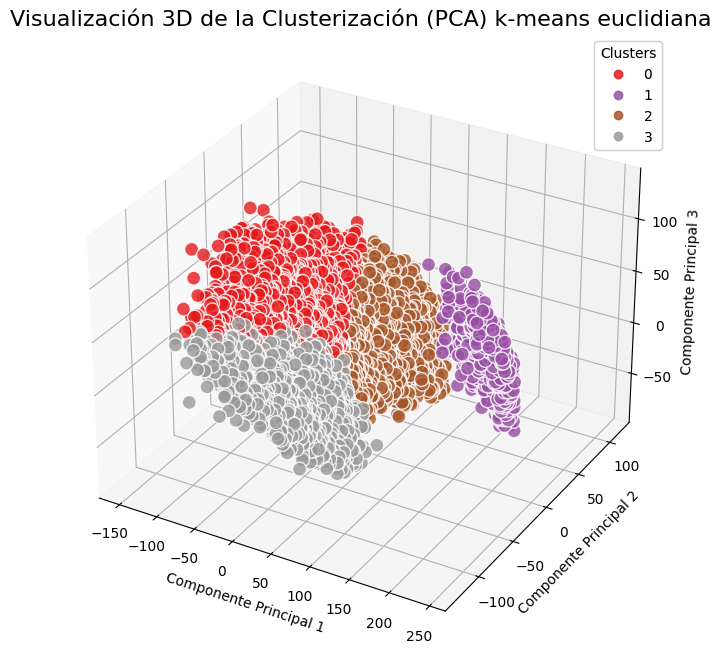

In [74]:
kmeans_3D= graficar_clusters_PCA3D(clusters_manuales, 'k-means euclidiana')